# Hypothesis 1:
Common weather variables have impact on amount of crimes.

Import packages.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import function_with_doctest as fn

Read in original data of Boston crime.

In [2]:
df = fn.get_boston_crime()

Formalize time data and clean blank values of data of Boston.
Output to csv.

In [3]:
df = df[['OFFENSE_CODE_GROUP','OCCURRED_ON_DATE','STREET']]
df['OCCURRED_ON_DATE']=df['OCCURRED_ON_DATE'].map(lambda x:x.split(' ')[0])
df.dropna(axis=0, how='any', inplace=True)
df.to_csv('prep_data/modified_boston_crime.csv', index = False)

Read in the csv and reshape the dataframe.

In [4]:
weather =  pd.read_csv('data/boston_weather.csv')
boston_crime = pd.read_csv('prep_data/modified_boston_crime.csv')

Check the normal distribution.

In [5]:
# combining weather data and crime data by date.
boston_crime_with_weather = fn.combine_weather(boston_crime, weather)
# checking the normal distribution of combined data
fn.check_distribution(boston_crime_with_weather)

normal distribution of rainfall: KstestResult(statistic=0.34521983909940535, pvalue=9.84211107452146e-168)
normal distribution of snowfall: KstestResult(statistic=0.5024198169740332, pvalue=0.0)
normal distribution of average temperature: KstestResult(statistic=0.08904051467817153, pvalue=2.7486129893279434e-11)
normal distribution of crime amount: KstestResult(statistic=0.039094467622822315, pvalue=0.015986018726578937)


Create scatter plot for a quick check.

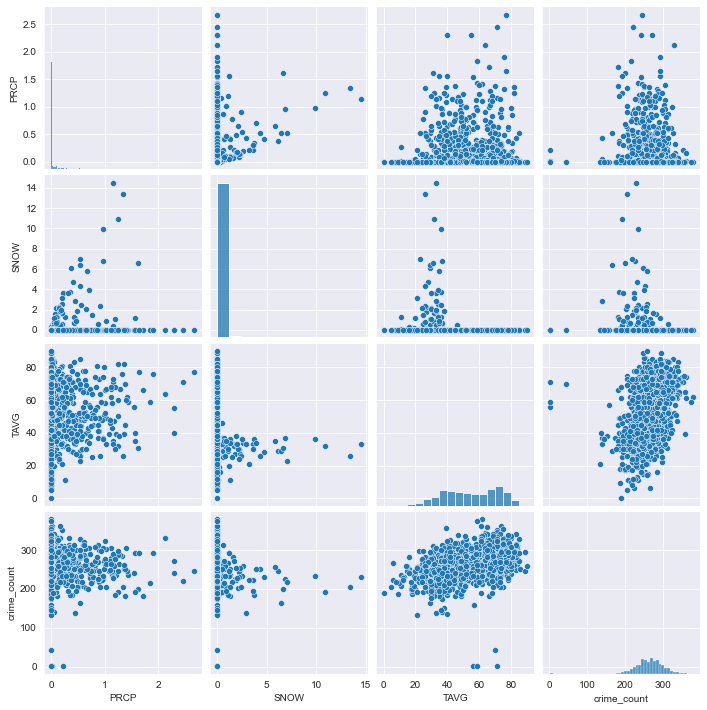

In [6]:
sns.pairplot(boston_crime_with_weather)

Linear correlation only exists between crime amount and average temperature?
Use Spearman for calculating related coefficient.

In [7]:
boston_crime_with_weather.corr(method='spearman')

,PRCP,SNOW,TAVG,crime_count
PRCP,1.000000,0.285304,-0.044631,-0.096889
SNOW,0.285304,1.000000,-0.318783,-0.207613
TAVG,-0.044631,-0.318783,1.000000,0.449838
crime_count,-0.096889,-0.207613,0.449838,1.000000


Common weather variables have little impact on amount of crimes.